In [1089]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [1090]:
df = pd.read_csv(r"B:\Machine Learning Projects\Sentiment Analysis(NLP)\train_new2.csv")
df.head(5)

,id,Text,label
0,0,I can't shake off this constant sense of hopel...,Depression
1,1,I'm constantly second-guessing myself and my d...,Anxiety Disorder
2,2,"I'm feeling physically unwell, but I know it's...",Depression
3,3,I'm desperate to escape the overwhelming fear.,Panic Disorder
4,4,It's hard to describe the sensation of being t...,Panic Disorder


In [1091]:
print(df.shape)

(785, 3)


In [1092]:
df.isnull().sum()

id       0
Text     0
label    0
dtype: int64

## EDA

In [1093]:
label_counts= df["label"].value_counts()
label_counts

Depression                                208
Narcissistic Disorder                     158
Anger/ Intermittent Explosive Disorder    154
Anxiety Disorder                          153
Panic Disorder                            112
Name: label, dtype: int64

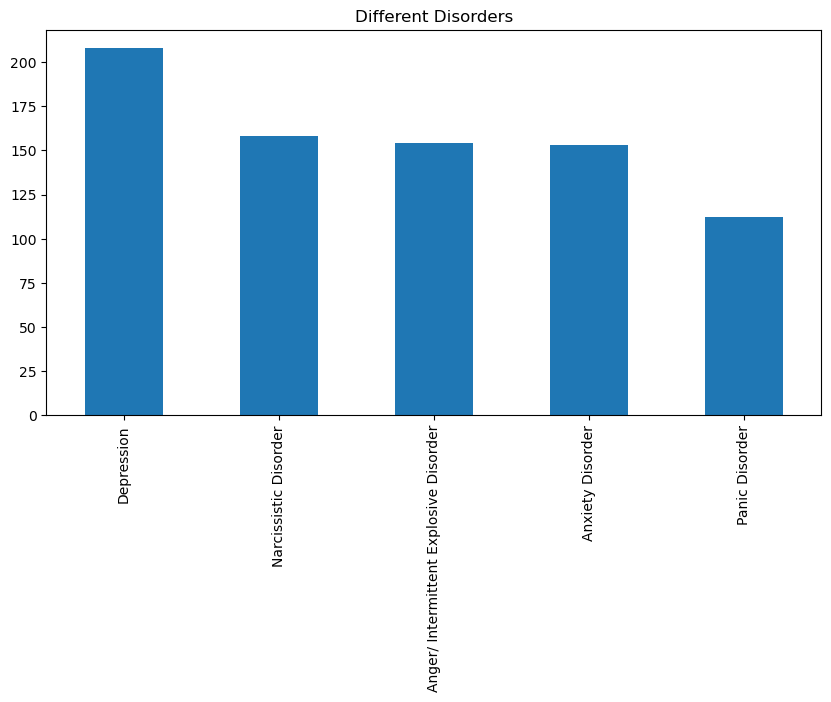

In [1094]:
label_counts.plot(kind="bar",figsize=(10,5))
plt.title("Different Disorders")
plt.xticks(rotation = "vertical")
plt.show()

#### Data Cleaning

In [1095]:
import re   #regular expression
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1096]:
corpus=[]

for i in range(0,785):
    text = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text= " ".join(text)
    corpus.append(text)

In [1097]:
corpus

['shake constant sens hopeless',
 'constantli second guess decis',
 'feel physic unwel know not',
 'desper escap overwhelm fear',
 'hard describ sensat trap fear',
 'avoid trigger prevent panic isol',
 'chest feel tight struggl breath',
 'day feel like carri heavi weight hard explain',
 'overanalyz everi social interact',
 'tri navig convers emot run high',
 'challeng find way handl power emot reaction',
 'worri anger drive peopl away',
 'even want remain calm emot surg unexpectedli',
 'feel like stuck cycl perpetu worri',
 'feel like alway verg explod',
 'expect other admir tast choic',
 'wish could manag anger better',
 'afraid anger lead lose import relationship',
 'worri peopl see facad confid',
 'often interrupt convers redirect attent',
 'even want remain calm emot surg unexpectedli',
 'wish better control reaction angri',
 'feel like disappoint everyon care',
 'overwhelm constant chatter anxiou thought',
 'tri catch breath even not physic run',
 'consum need perfect avoid mistak

#### Data Transformation

In [1098]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)

In [1099]:
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [1100]:
import pickle
path = "B:\Machine Learning Projects\Sentiment Analysis(NLP)\sentiments_words.pkl"
pickle.dump(cv, open(path, "wb"))

In [1101]:
##  Training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.42,random_state=32)


In [1102]:
## ML Model

from sklearn.naive_bayes import   MultinomialNB
classifier =  MultinomialNB()
classifier.fit(x_train, y_train)


MultinomialNB()

In [1103]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'B:\Machine Learning Projects\Sentiment Analysis(NLP)\classifier_sentiment_model') 

['B:\\Machine Learning Projects\\Sentiment Analysis(NLP)\\classifier_sentiment_model']

### Model Performance

In [1104]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[46  0 20  1  0]
 [ 2 52  5  1  7]
 [12 10 63  5  3]
 [ 0  0  6 50  0]
 [ 2 10  6  0 29]]


0.7272727272727273

## Model Performance

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.5 ,random_state =10)

models = {
        "Logistic Regression" : LogisticRegression(),
        "Decision Tree" : DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier() 
 }
    
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred , average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_roc = roc_auc_score(y_train, y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred , average="weighted")
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_roc = roc_auc_score(y_test, y_test_pred)
    
    
    print(list(models.key())[i])
    
    print("Performance for training------>>>>>")
    print("Accuracy->".format(model_train_accuracy))
    print("f1 score->".format(model_train_f1))
    print("Precison ->".format(model_train_precision))
    print("Recall ->".format(model_train_recall))
    print("ROC Auc Score->".format(model_train_roc))
    
    print("Performance for test------>>>>>")
    print("Accuracy->".format(model_test_accuracy))
    print("f1 score->".format(model_test_f1))
    print("Precison ->".format(model_test_precision))
    print("Recall ->".format(model_test_recall))
    print("ROC Auc Score->".format(model_test_roc))